In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
root = '../../Week 0/data/'
d1_path = root + 'benin-malanville.csv'
d2_path = root + 'sierraleone-bumbuna.csv'
d3_path = root + 'togo-dapaong_qc.csv'

In [8]:
df = pd.read_csv(d1_path)

In [11]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [12]:
# Summary Statistics
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [21]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


### Data Quality Check

#### Check for missing values, outliers or incorrect entries, columns like (GHI, DNI, DHI) and check for outliers in columns like (ModA, ModB, WS, WSgust)

In [19]:
# Check for null values
null_values = df.isnull().sum()

print('Null values: ', null_values)

# Check for negative values in GHI, DNI, DHI columns
neg_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print('Negative values: ', len(neg_values))

Null values:  Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Negative values:  278722


C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


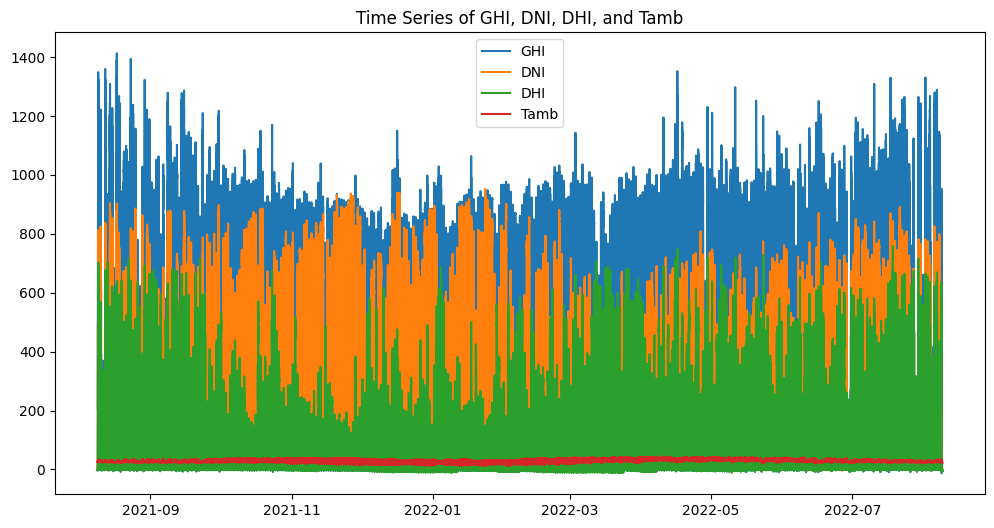

In [25]:
# Convert the time column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot time series for GHI, DNI, DHI, and Tamb
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.legend()
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.show()

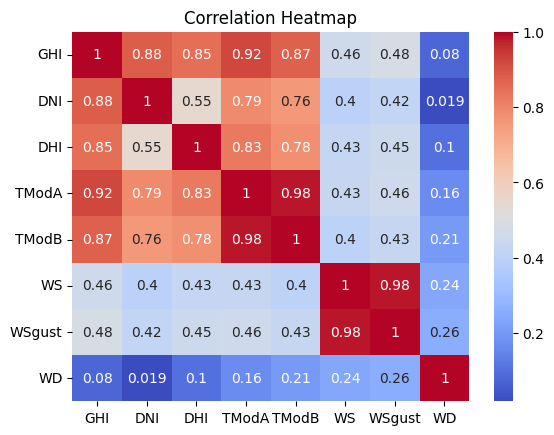

In [28]:
# Correlation heatmap
correlation = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


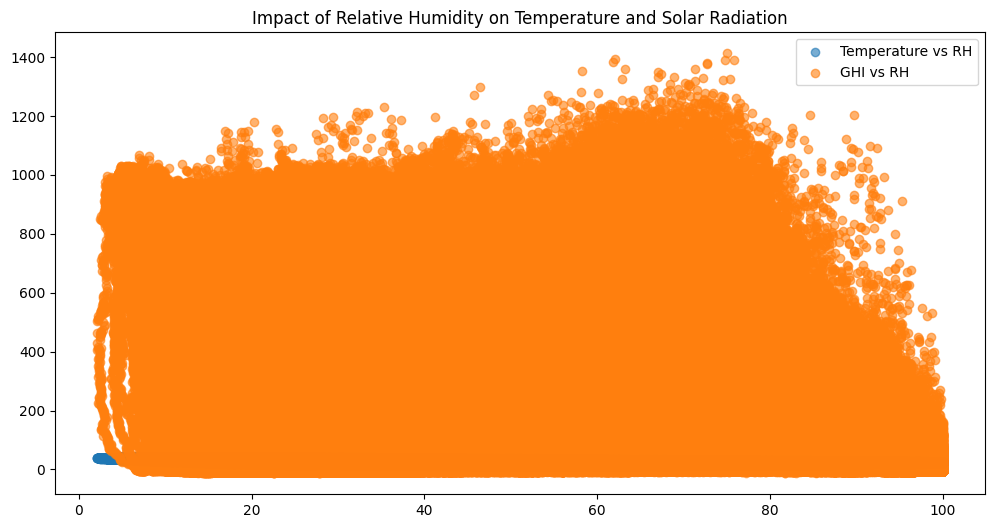

In [29]:
# Scatter plot of RH vs Temperature and GHI
plt.figure(figsize=(12, 6))
plt.scatter(df['RH'], df['Tamb'], alpha=0.6, label='Temperature vs RH')
plt.scatter(df['RH'], df['GHI'], alpha=0.6, label='GHI vs RH')
plt.legend()
plt.title('Impact of Relative Humidity on Temperature and Solar Radiation')
plt.show()

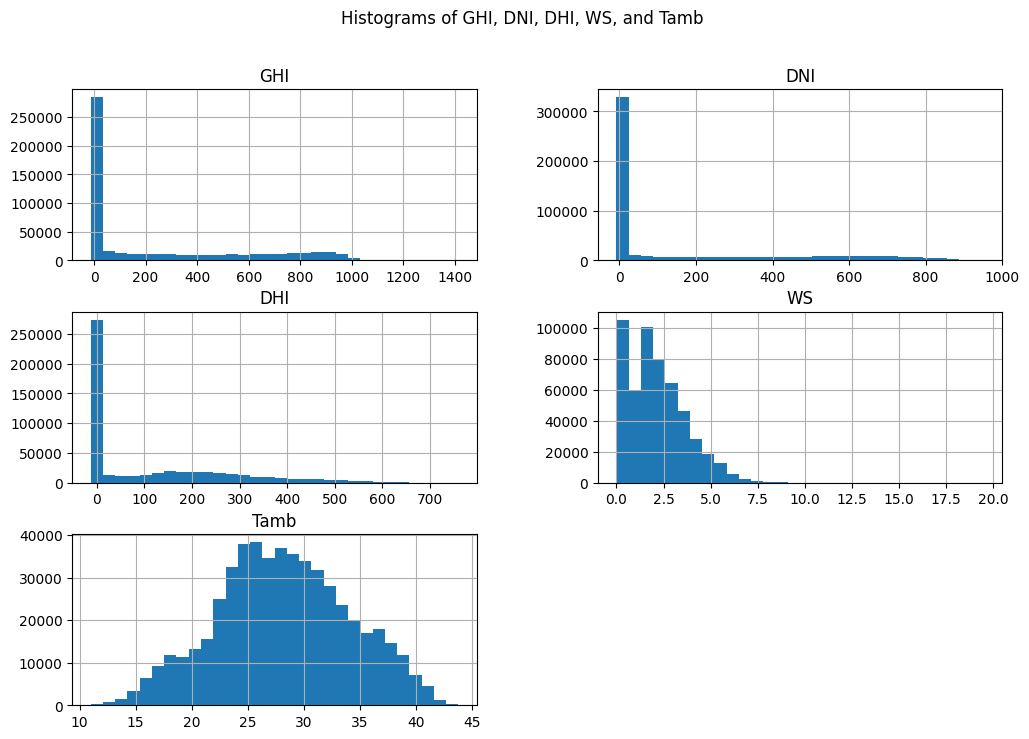

In [30]:
# Histograms of key variables
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of GHI, DNI, DHI, WS, and Tamb')
plt.show()

In [36]:
# Drop rows with missing values in important columns (e.g., GHI, DNI)
df_cleaned = df.dropna(subset=['GHI', 'DNI', 'DHI', 'ModA', 'ModB'])

# Replace or impute missing values in other columns
df_cleaned = df_cleaned['WSgust'].fillna(df_cleaned['WSgust'].mean())

# Remove rows with negative values where not appropriate
# df_cleaned = df_cleaned[(df_cleaned['GHI'] >= 0) & (df_cleaned['DNI'] >= 0) & 
#                         (df_cleaned['DHI'] >= 0) & (df_cleaned['ModA'] >= 0) & 
#                         (df_cleaned['ModB'] >= 0) & (df_cleaned['WS'] >= 0)]

count    525600.000000
mean          2.809195
std           2.029120
min           0.000000
25%           1.300000
50%           2.600000
75%           4.100000
max          26.600000
Name: WSgust, dtype: float64

In [39]:
df_cleaned.describe()

count    525600.000000
mean          2.809195
std           2.029120
min           0.000000
25%           1.300000
50%           2.600000
75%           4.100000
max          26.600000
Name: WSgust, dtype: float64